In [1]:
#importing packages and libraries 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import plotly.express as px
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [3]:
#uploading dataset1
path1 = '/Users/gracewang/Desktop/Dartmouth/DALI_Lab/DALI_Data.csv'
file1 = pd.read_csv(path1)
file1.head()

,name,year,picture,gender,American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,Middle Eastern,Native Hawaiian or Other Pacific Islander,...,minor,modification,birthday,role,home,quote,favoriteShoe,favoriteArtist,favoriteColor,phoneType
0,Justin Luo,'20,https://api.typeform.com/responses/files/30e6c...,Male,NaN,Asian,NaN,NaN,NaN,NaN,...,NaN,NaN,7/27/98,Designer,"Germantown, WI","""Don't cry because it's over, smile because it...",Allbirds,Cage the Elephant,Blue,iOS
1,Jasmine Mai,'20,https://api.typeform.com/responses/files/1fbd3...,Female,NaN,Asian,NaN,NaN,NaN,NaN,...,NaN,Digital Arts,5/2/98,Developer,"San Francisco, CA","""Adventure is out there!"" - Up",Running shoes,Ariana Grande,Blue,iOS
2,Mira Ram,'20,https://api.typeform.com/responses/files/97f2a...,Other,NaN,Asian,NaN,NaN,NaN,NaN,...,NaN,NaN,1/2/99,Designer,"Topeka, KS","""I was gonna say something, but I forgot""",Lace-up bootes,Reol,"Magenta, Aqua Blue",iOS
3,Yeonjae Park,'19,https://api.typeform.com/responses/files/0c4be...,Female,NaN,Asian,NaN,NaN,NaN,NaN,...,NaN,NaN,4/12/97,"Developer, Core","Boston, MS","""Nothing is impossible, the word itself says '...",Sneakers,DEAN,Blue,iOS
4,Alan Lu,'19,https://api.typeform.com/responses/files/3785b...,Male,NaN,Asian,NaN,NaN,NaN,NaN,...,NaN,NaN,9/15/97,Developer,"Reading, PA","""You miss 100% of the shots you don't take"" - ...",Sneakers,Kanye,Red,iOS


In [4]:
#seeing how many of each gender is in the dataset
file1.gender.value_counts()

Female    40
Male      25
Other      1
Name: gender, dtype: int64

In [7]:
#creating bar chart of distribution of gender
gender =['male', 'female', 'other']
colors = ['lightblue', 'purple','gold']
fig = go.Figure([go.Bar(x=gender, y=[25, 40, 1], marker_color=colors)])
fig.update_layout(title_text='Distribution of Gender')
fig.show()
#saving figure
fig.write_image("images/genderbar.jpeg")

In [8]:
#seeing how many of each year is in the dataset
file1.year.value_counts()

'19    24
'20    23
'21    12
'22     7
Name: year, dtype: int64

In [9]:
#creating donut pie chart to show distribution of years
year =['Senior', 'Junior', 'Sophomore', 'Freshmen']
fig = go.Figure(data=[go.Pie(labels=year, values=[24,23,12,7], hole=.3)])
fig.update_layout(title_text='Distribution of Grade Level')
fig.show()
#saving figure
fig.write_image("images/yearpie.jpeg")

In [15]:
#seeing how many of each phone type is in the dataset
file1.phoneType.value_counts()

iOS        56
Android     9
Other       1
Name: phoneType, dtype: int64

In [10]:
#creating pie chart to show distribution of years
fig = px.pie(file1, values=[56,9,1], names=['iOS','Android','Other'])
fig.update_layout(title_text='Distribution of Phone Types')
fig.show()
#saving figure
fig.write_image("images/phonepie.jpeg")

In [11]:
#uploading dataset2
path2 = '/Users/gracewang/Desktop/Dartmouth/DALI_Lab/DALI_Data-Anon.csv'
file2 = pd.read_csv(path2)
file2.head()

,year,gender,heightInches,happiness,stressed,sleepPerNight,socialDinnerPerWeek,alcoholDrinksPerWeek,caffeineRating,affiliated,numOfLanguages,gymPerWeek,hoursOnScreen,phoneType
0,'19,Female,63.0,4,2,7,3.0,4.0,1,1,2,3.0,6.0,iOS
1,'19,Male,71.0,4,5,7,3.0,8.0,6,1,2,4.0,6.0,iOS
2,'19,Female,63.0,4,4,7,3.0,2.0,1,1,1,0.0,9.0,Other
3,'19,Male,70.0,4,5,7,7.0,7.0,8,1,1,3.0,7.0,Android
4,'19,Male,70.0,4,8,7,3.0,3.0,3,1,2,5.0,6.0,iOS


In [23]:
#contingency table to view counts
contingency_table = pd.crosstab( file2['gender'],file2['affiliated'],margins = True)
contingency_table

affiliated,0,1,All
gender,,,
Female,13,27,40
Male,15,10,25
Other,1,0,1
All,29,37,66


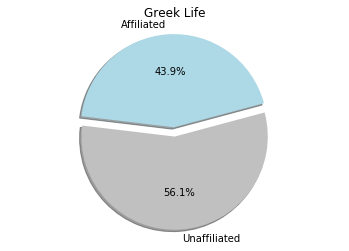

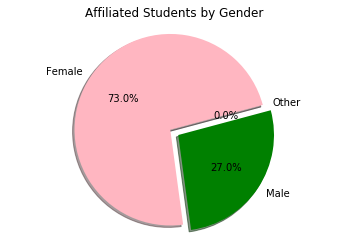

In [24]:
#creating pie chart that shows distribution of affiliated and unaffiliated
Affiliated = [29,37]
my_labels = 'Affiliated','Unaffiliated'
my_colors = ['lightblue','silver']
my_explode = (0, 0.1)
plt.pie(Affiliated, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Greek Life')
plt.axis('equal')
plt.show()

#creating pe chart that breaks down affiliated students by gender
Gender = [27,10,0]
my_labels = 'Female','Male','Other'
my_colors = ['lightpink','green','silver']
my_explode = (0, 0.1, 0)
plt.pie(Gender, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Affiliated Students by Gender')
plt.axis('equal')
plt.show()

In [16]:
#scatterplot of alcohol and caffeine 
#bigger the dot, more caffeine is consumed
#color grouped by year
fig = px.scatter(file2, x="alcoholDrinksPerWeek", y="caffeineRating", color="year", size = 'caffeineRating',hover_data=['sleepPerNight','caffeineRating'])
fig.update_layout(title_text='Alcohol and Caffeine')
fig.show()
#saving figure
fig.write_image("images/alcandcafscatter.jpeg")

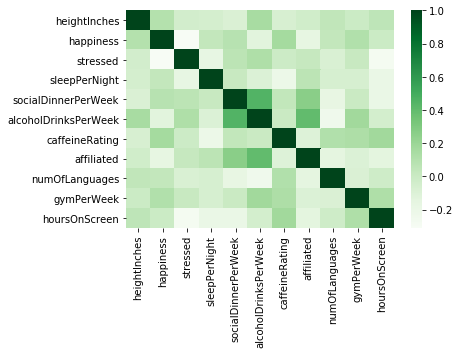

In [34]:
#heatmap to see correlation between variables
sb.heatmap(file2.corr(), cmap='Greens')
plt.show()
#Strongest correlations are between social dinners per week vs. alcohol drinks per week and affiliated vs. alcohol drinks

In [61]:
#creating new dataset that does not have Nan valies
cleaned = file2.dropna()

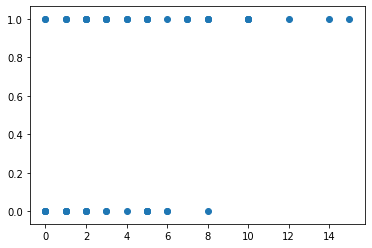

In [62]:
#visualizing the data
plt.scatter(cleaned.alcoholDrinksPerWeek, cleaned.affiliated)

In [63]:
#splitting into traning and testing groups
X_train, X_test, Y_train, Y_test = train_test_split(cleaned[['alcoholDrinksPerWeek']],cleaned.affiliated, test_size = .2)

In [64]:
#viewing X_test
X_test

,alcoholDrinksPerWeek
57,15.0
60,4.0
50,0.0
4,3.0
7,12.0
59,5.0
14,0.0
56,6.0
44,2.0
5,14.0


In [66]:
#testing model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
#predictions
model.predict(X_test)

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [69]:
#accuracy of model
model.score(X_test,Y_test)

0.6923076923076923

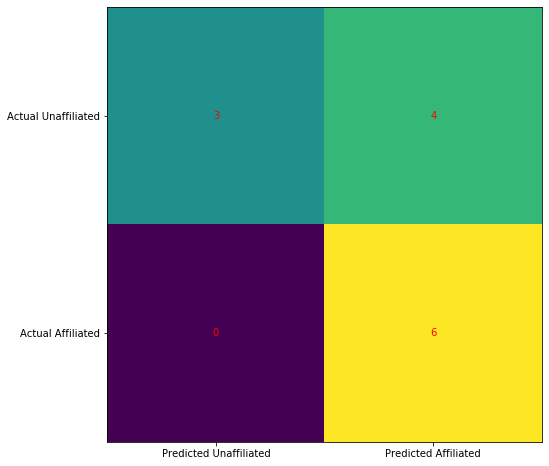

In [104]:
#viewing accuracy of model
cm = confusion_matrix(Y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Unaffiliated', 'Predicted Affiliated'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Unaffiliated', 'Actual Affiliated'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()